# NBA Rebounds and Three Pointers Data Analysis

In this project I will be trying to prove assumptions and answer questions about basketball using data. We will be talking about:

- The correlation between height and rebounds per game
- Proving and visualizing the evolution towards the current "three-point era"
- Answering how the three-point era impacts rebounding numbers for guards

### Firstly, we import and clean the data for easier and better analysis

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,8) 

In [84]:
#Importing the first dataset which consist of players' statistics per 36 minutes every season

statsdf = pd.read_csv(r'D:\Work\PortoProjects\NBA Data Exploration\pergame.csv')
statsdf.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Paul Arizin*,SF,23,PHW,66.0,NaN,44.5,8.3,18.5,0.448,...,NaN,NaN,11.3,2.6,NaN,NaN,NaN,3.8,25.4,1952
1,Cliff Barker,SG,31,INO,44.0,NaN,11.2,1.1,3.7,0.298,...,NaN,NaN,1.8,1.6,NaN,NaN,NaN,1.3,2.9,1952
2,Leo Barnhorst,SF,27,INO,66.0,NaN,35.5,5.3,13.6,0.389,...,NaN,NaN,6.5,3.9,NaN,NaN,NaN,3.0,12.4,1952
3,Nelson Bobb,PG,27,PHW,62.0,NaN,19.2,1.8,4.9,0.359,...,NaN,NaN,2.4,2.7,NaN,NaN,NaN,2.9,5.1,1952
4,Vince Boryla,SF,24,NYK,42.0,NaN,34.3,4.8,12.4,0.387,...,NaN,NaN,5.2,2.1,NaN,NaN,NaN,2.9,11.9,1952


In [4]:
#Importing the second dataset which consist of players' data

playersdf = pd.read_csv(r'D:\Work\PortoProjects\NBA Data Exploration\players.csv')
playersdf.head()

,id,name,full_name,position,height,weight,birth_date,birth_place,retired,player_url,current_team_id,teams,text
0,1,Alaa Abdelnaby,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",True,/players/a/abdelal01.html,NaN,"[25, 2, 26, 17, 23]","Alaa Abdelnaby (Arabic: علاء عبد النبي‎, born ..."
1,2,Zaid Abdul-Aziz,Zaid Abdul-Aziz,C-F,6-9,235.0,April 7 1946,"Brooklyn, New York",True,/players/a/abdulza01.html,NaN,"[11, 17, 2]",Zaid Abdul-Aziz (born Donald A. Smith on April...
2,3,Kareem Abdul-Jabbar,Kareem Abdul-Jabbar,C,7-2,225.0,April 16 1947,"New York, New York",True,/players/a/abdulka01.html,NaN,"[14, 17]",Kareem Abdul-Jabbar (born Ferdinand Lewis Alci...
3,4,Mahmoud Abdul-Rauf,Mahmoud Abdul-Rauf,G,6-1,162.0,March 9 1969,"Gulfport, Mississippi",True,/players/a/abdulma02.html,NaN,"[8, 26]",Mahmoud Abdul-Rauf (born Chris Wayne Jackson o...
4,5,Tariq Abdul-Wahad,Tariq Abdul-Wahad,F,6-6,223.0,November 3 1974,"Maisons Alfort, France",True,/players/a/abdulta01.html,NaN,"[26, 8, 22, 7]",Tariq Abdul-Wahad (born Olivier Michael Saint-...


In [5]:
# Cleaning the players dataset, converting the height to centimeters

cols = list(playersdf.columns.values) + ["height_cm"]
playersdf = playersdf.reindex(columns = cols)
cmrows = []

for x in playersdf['height']:
    feet = int(x.split("-")[0])
    inch = int(x.split("-")[1])
    heightincm = feet*30.48 + inch*2.54
    cmrows.append(heightincm)

playersdf['height_cm']=cmrows
playersdf.head()

,id,name,full_name,position,height,weight,birth_date,birth_place,retired,player_url,current_team_id,teams,text,height_cm
0,1,Alaa Abdelnaby,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",True,/players/a/abdelal01.html,NaN,"[25, 2, 26, 17, 23]","Alaa Abdelnaby (Arabic: علاء عبد النبي‎, born ...",208.28
1,2,Zaid Abdul-Aziz,Zaid Abdul-Aziz,C-F,6-9,235.0,April 7 1946,"Brooklyn, New York",True,/players/a/abdulza01.html,NaN,"[11, 17, 2]",Zaid Abdul-Aziz (born Donald A. Smith on April...,205.74
2,3,Kareem Abdul-Jabbar,Kareem Abdul-Jabbar,C,7-2,225.0,April 16 1947,"New York, New York",True,/players/a/abdulka01.html,NaN,"[14, 17]",Kareem Abdul-Jabbar (born Ferdinand Lewis Alci...,218.44
3,4,Mahmoud Abdul-Rauf,Mahmoud Abdul-Rauf,G,6-1,162.0,March 9 1969,"Gulfport, Mississippi",True,/players/a/abdulma02.html,NaN,"[8, 26]",Mahmoud Abdul-Rauf (born Chris Wayne Jackson o...,185.42
4,5,Tariq Abdul-Wahad,Tariq Abdul-Wahad,F,6-6,223.0,November 3 1974,"Maisons Alfort, France",True,/players/a/abdulta01.html,NaN,"[26, 8, 22, 7]",Tariq Abdul-Wahad (born Olivier Michael Saint-...,198.12


In [6]:
#Seeing that there are players that are listed as 'PG', further data cleaning is done to standardize the positions

playersdf.loc[playersdf['position'] == 'PG'] = 'G'

In [145]:
#We now combine the dataframes together before starting our analysis
df = pd.merge(left=playersdf, right=statsdf, how='outer', left_on='name', right_on='Player')

#Dropping NaN or Null values and columns we don't need
df = df.drop(df.loc[df.height_cm.str.isnumeric() == False].index)
df = df.drop(df.loc[df['G']<20].index)
df = df.drop(df.loc[pd.to_numeric(df['year']).notnull() == False].index)
df.dropna(subset=['name'], inplace=True)
df = df.drop(columns=['id','full_name','retired', 'player_url', 'current_team_id','teams','text','G','GS','MP', 'FG', 'FGA','ORB','DRB',
       'FG%','AST', 'STL', 'BLK', 'TOV', 'PF','2P', '2PA', '2P%', 'eFG%'])

#Converting Values
df['height_cm'] = df['height_cm'].astype('float64')
df['year'] = df['year'].astype('int64')

df.head()

,name,position,height,weight,birth_date,birth_place,height_cm,Player,Pos,Age,Tm,3P,3PA,3P%,FT,FTA,FT%,TRB,PTS,year
0,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",208.28,Alaa Abdelnaby,PF,23.0,POR,0.0,0.0,NaN,1.1,1.4,0.752,3.7,6.1,1992
1,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",208.28,Alaa Abdelnaby,PF,24.0,TOT,0.0,0.0,0.0,1.2,1.5,0.759,4.5,7.7,1993
3,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",208.28,Alaa Abdelnaby,PF,24.0,BOS,0.0,0.0,NaN,1.2,1.6,0.760,4.8,8.2,1993
5,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",208.28,Alaa Abdelnaby,PF,26.0,TOT,0.0,0.0,0.0,0.4,0.6,0.571,2.1,4.7,1995
6,Alaa Abdelnaby,F-C,6-10,240.0,June 24 1968,"Cairo, Egypt",208.28,Alaa Abdelnaby,PF,26.0,SAC,0.0,0.0,0.0,0.4,0.7,0.571,2.1,5.0,1995


In [113]:
#Checking if join is succesful

df.loc[df['name'].str.contains('LeBron')].head()

,name,position,height,weight,birth_date,birth_place,height_cm,Player,Pos,Age,Tm,3P,3PA,3P%,FT,FTA,FT%,TRB,PTS,year
11373,LeBron James,F-G,6-9,250.0,December 30 1984,"Akron, Ohio",205.74,LeBron James,SF,20.0,CLE,1.4,3.9,0.351,6.0,8.0,0.750,7.4,27.2,2005
11374,LeBron James,F-G,6-9,250.0,December 30 1984,"Akron, Ohio",205.74,LeBron James,SF,21.0,CLE,1.6,4.8,0.335,7.6,10.3,0.738,7.0,31.4,2006
11375,LeBron James,F-G,6-9,250.0,December 30 1984,"Akron, Ohio",205.74,LeBron James,SF,22.0,CLE,1.3,4.0,0.319,6.3,9.0,0.698,6.7,27.3,2007
11376,LeBron James,F-G,6-9,250.0,December 30 1984,"Akron, Ohio",205.74,LeBron James,SF,23.0,CLE,1.5,4.8,0.315,7.3,10.3,0.712,7.9,30.0,2008
11377,LeBron James,F-G,6-9,250.0,December 30 1984,"Akron, Ohio",205.74,LeBron James,SF,24.0,CLE,1.6,4.7,0.344,7.3,9.4,0.780,7.6,28.4,2009


## With the data imported and cleaned, we can start doing our analysis

Firstly, let's look at how height correlates to rebounds per game

<function matplotlib.pyplot.show(close=None, block=None)>

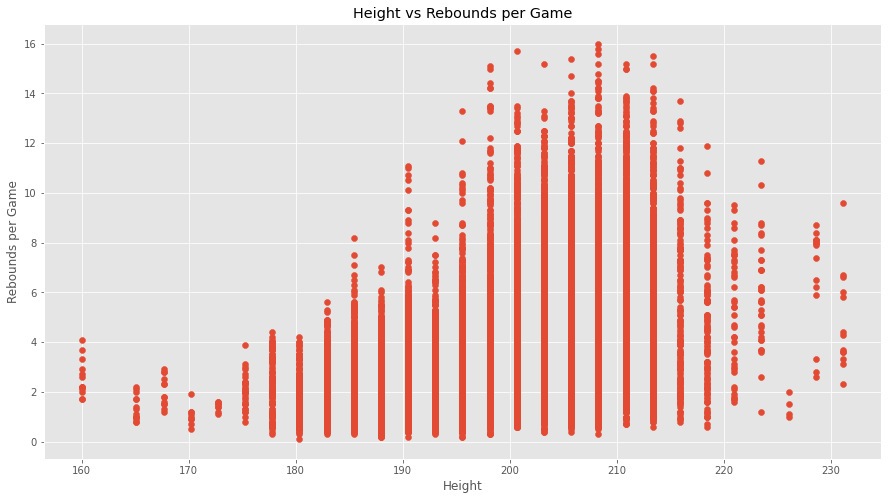

In [77]:
#Scatter plot between height and rebound per 36 minutes

plt.scatter(x=df['height_cm'], y=df['TRB'])
plt.title('Height vs Rebounds per Game')
plt.xlabel('Height')
plt.ylabel('Rebounds per Game')

plt.show

Text(0, 0.5, 'Rebounds per Game')

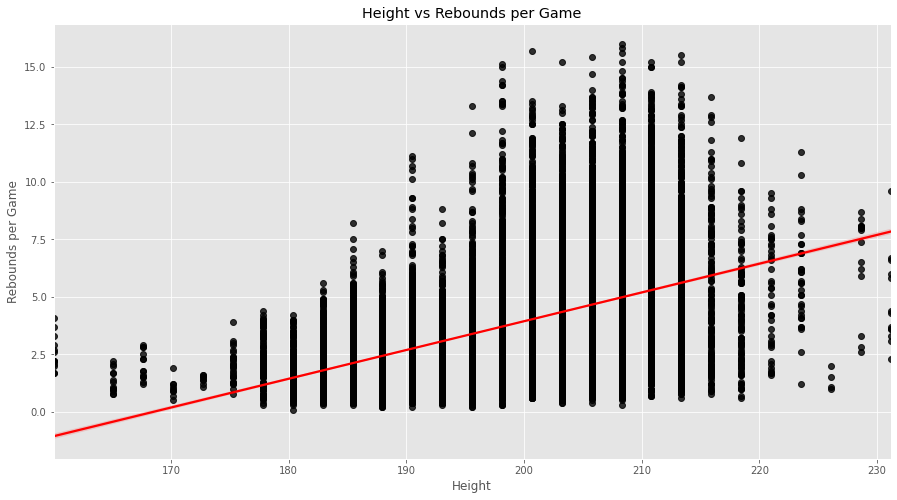

In [78]:
#Plot the regression plot of height vs total rebounds per game

sns.regplot(x='height_cm', y='TRB',data=df, scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.title('Height vs Rebounds per Game')
plt.xlabel('Height')
plt.ylabel('Rebounds per Game')

In [79]:
#Start looking at correlations for some limited parameters only
df.corr()

,height_cm,Age,3P,3PA,3P%,FT,FTA,FT%,TRB,PTS
height_cm,1.000000,-0.001745,-0.314776,-0.336026,-0.268971,-0.033363,0.020854,-0.310920,0.456456,-0.071791
Age,-0.001745,1.000000,0.069301,0.057108,0.077564,-0.044034,-0.070363,0.112348,-0.006476,-0.021281
3P,-0.314776,0.069301,1.000000,0.988138,0.523019,0.240504,0.173993,0.363018,-0.059221,0.448303
3PA,-0.336026,0.057108,0.988138,1.000000,0.504394,0.256767,0.190935,0.365031,-0.062466,0.458366
3P%,-0.268971,0.077564,0.523019,0.504394,1.000000,0.024439,-0.027692,0.279052,-0.189008,0.150118
FT,-0.033363,-0.044034,0.240504,0.256767,0.024439,1.000000,0.981897,0.329572,0.520047,0.882618
FTA,0.020854,-0.070363,0.173993,0.190935,-0.027692,0.981897,1.000000,0.197424,0.589232,0.862800
FT%,-0.310920,0.112348,0.363018,0.365031,0.279052,0.329572,0.197424,1.000000,-0.084676,0.353556
TRB,0.456456,-0.006476,-0.059221,-0.062466,-0.189008,0.520047,0.589232,-0.084676,1.000000,0.536007
PTS,-0.071791,-0.021281,0.448303,0.458366,0.150118,0.882618,0.862800,0.353556,0.536007,1.000000


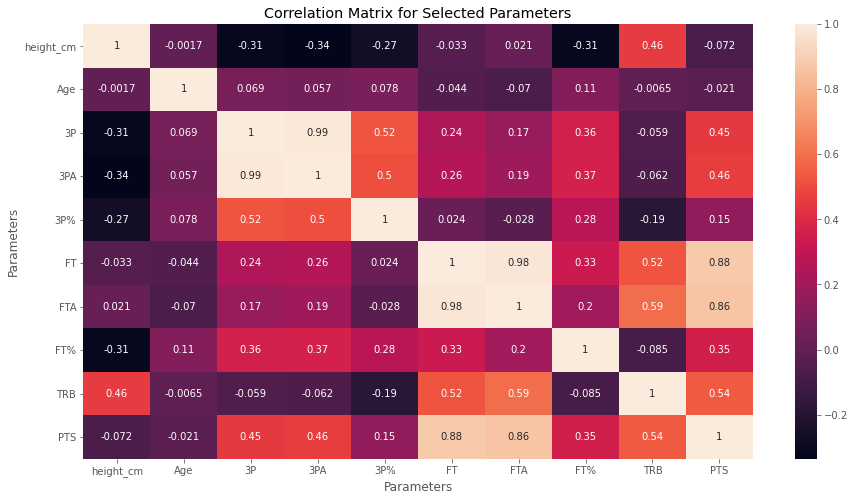

In [81]:
#Plot correlation onto heatmap

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Selected Parameters')
plt.xlabel('Parameters')
plt.ylabel('Parameters')

plt.show()

As we can see, height does not have the highest correlation to Total Rebounds per Game (TRB), instead Free Throw Attempts(FTA), Free Throw Made(FT), and Points(PTS) have higher correlations

## Moving on to the second question

Next we want to see how the game of basketball has evolved into the three point era as we know it today. We will look at the average three point attempts of each player every year and chart it into a graph

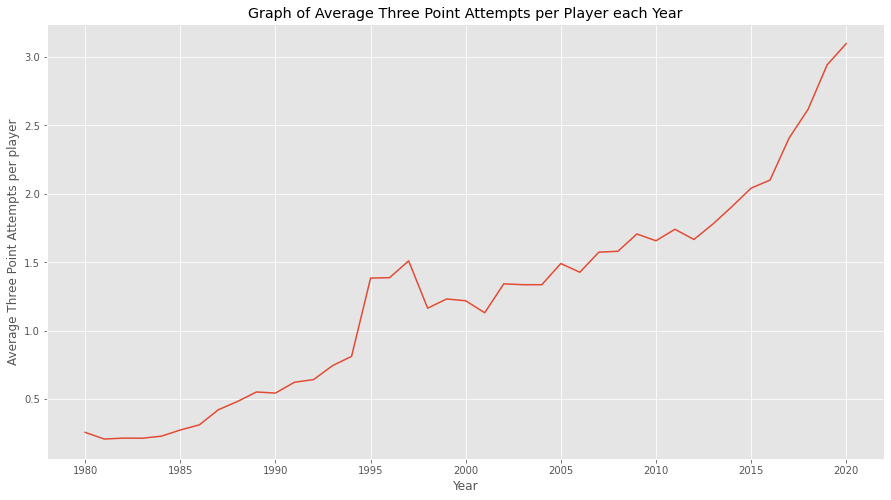

In [200]:
#Firstly we remove all years earlier than 1980 since the 3 point line did not exist

df = df.drop(df.loc[df['year']<1980].index)

#Now we find the average 3 point attempts per player per year

plt.title('Graph of Average Three Point Attempts per Player each Year')
plt.xlabel('Year')
plt.ylabel('Average Three Point Attempts per player')
plt.plot(df.groupby(['year']).mean('3PA')['3PA'])

As we see, there is a clear trend as we see the average three point attempts per player going up every year and the increase ramping up from early 2010s.

## Third Question

Now we will see how these two questions come together. Does more three point attempts mean longer rebounds which mean guards get more rebounds?

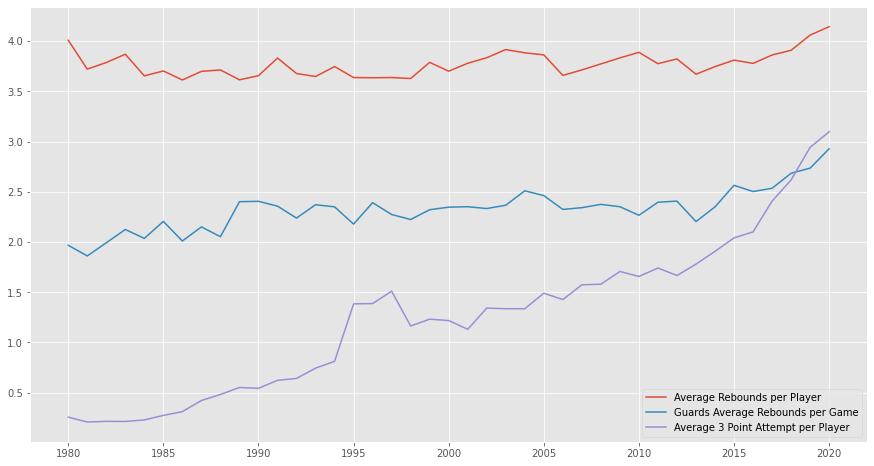

In [208]:
guarddf = df.loc[df['position'] == "G"]

plt.plot(df.groupby(['year']).mean('TRB')['TRB'],label='Average Rebounds per Player')
plt.plot(guarddf.groupby(['year']).mean('TRB')['TRB'], label='Guards Average Rebounds per Game')
plt.plot(df.groupby(['year']).mean('3PA')['3PA'],label='Average 3 Point Attempt per Player')
plt.legend()

We can see from the graph that even though the average rebounds per game seem to stay consistent as the years go by, the average rebound per game <b>for guards</b> seem to be going up as the average three point attempts per player goes up. We can look further into this with a correlation heatmap to see if the numbers back it up

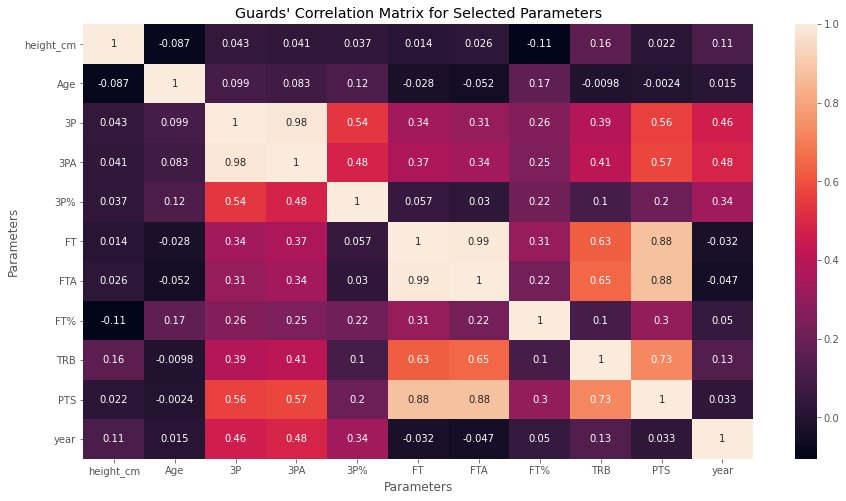

In [209]:
correlation_matrix = guarddf.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Guards' Correlation Matrix for Selected Parameters")
plt.xlabel('Parameters')
plt.ylabel('Parameters')

plt.show()

As we can see, for guards, rebounds per game correlates with thee point attempts at 41%, however other factors are still more highly correlated such as points per game or free throws. One reason this might happen is because longer shots mean longer rebounds which usually end up in a guard's hands.

## Conclusion

To conclude, from this analysis we can see that height does not strongly correlate to rebounds per game. Secondly, we proved and graphed the evolution of the game looking at players' average three point attempts per year. Lastly, we can see that the increase in players' average three point attempts also correlates with the increase in the guards' rebounds per game.